### Goal: 
##### To build a text classification model to predict the artist from a piece of text

In [1]:
#To make this scrapper look legitimate, we spoof the headers we send along with our requests

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

1. Download HTML pages --> 2. Get a list of song urls --> 3. Extract lyrics from song urls

In [2]:
BASE_URL = "https://www.lyrics.com"

def get_lyrics(path):
    new_url = BASE_URL + path
    r = requests.get(new_url)
    soup = BeautifulSoup(r.content , 'html.parser')
    return soup.find('h1').text, soup.find('pre').text

In [ ]:
url = BASE_URL + "/artist/Backstreet-Boys/199819"

r = requests.get(url)
soup = BeautifulSoup(r.content , 'html.parser')
tags = soup.find_all('strong')

song_links = []
# iterate over each song entry and grab the link to the lyrics
for content in tags:
    link = content.find('a')
    if link and link['href'].startswith('/lyric'):
        song_links.append(link['href'])

In [ ]:
songs = {}
# then we iterate over all the lyric links and get the lyrics for each song
# those lyrics are then stored in songs[song_title]
for l in song_links:
    song,lyrics = get_lyrics(l)
    songs[song] = lyrics

In [3]:
songs

{"Don't Go Breaking My Heart": "I got mixed emotions\nDid I finally find me a river that could lead me out to the ocean?\n'Cause I've only ever known the kind of love \nThat leaves you battered and broken\nSo forgive me for my mixed emotions, yeah yeah\n\nI'm not that kind of person who can fall in and out of love with you\nThat's not what love's supposed to do\nI'm not that kind of person who can fall in and out of love with you\nThat's not what love's supposed to do\n\nBaby, don't go breaking my heart, breaking my heart\nBaby, don't go breaking my heart, breaking my heart\n'Cause it's the only one I got\n'Cause it's the only one I got\n\nAm I being too open?\n'Cause I told you everything I have to say \nAnd now we're having a moment\nDoes it make you wanna pick up all your things \nAnd drive away like it's stolen?\nJust forgive me if I'm being too open, no no no no, yeah yeah yeah\n\nI'm not that kind of person who can fall in and out of love with you\nThat's not what love's supposed

In [6]:
print (songs['OK'])

July
It's only been a month since I met you
I gotta say that was my favorite June
And I knew, from that night
That I would be alright

If I
I only knew that one day I would find
Someone like you, I'd take back all those nights I wasted
Looking for the right one at the wrong door

We fit together, you make me better
Whatever it takes, I'm here forever
Bad things will happen, but none of that matters
We'll find a way, as long as I'm with you, I'm ok

Baby, I'm all in it
Just tell me you were on in it
People wanna talk, shut 'em all off
And tell 'em all to mind their business
Will for the grumps and cynics
Been that way from the beginning
People see what they don't have
They get sad and act out 'cause they're winning

Ooh, I love the way you wanna love me too
Ooh, eh, eh

We fit together, you make me better
Whatever it takes, I'm here forever
Bad things will happen, but none of that matters
We'll find a way, as long as I'm with you, I'm ok

Nothing else matters
As long as I'm with you, I'

In [20]:
df = pd.DataFrame(list(songs.items()),columns = ['Title','Lyrics'])
df.head(2)

,Title,Lyrics
0,Don't Go Breaking My Heart,I got mixed emotions\nDid I finally find me a ...
1,Nobody Else,Just memorizing lines upon your face\nI made a...


**Pre-processing of data:** 
1. Tokenization (process of segmenting or separating text into words, clauses or sentences, & removal of punctuation) 
2. Stemming (reducing related words to a common stem)
3. Removal of Stop Words (removal of commonly used words unlikely to be useful for learning)

In [21]:
import re

#clean the data by removing all special chaacters

df['lyricss'] = df['Lyrics'].str.replace('\W', ' ')
#df['lyricss'] = df['Lyrics'].map(lambda x: re.sub(r'\W+', ' ', x))
df.head(4)

,Title,Lyrics,lyricss
0,Don't Go Breaking My Heart,I got mixed emotions\nDid I finally find me a ...,I got mixed emotions Did I finally find me a r...
1,Nobody Else,Just memorizing lines upon your face\nI made a...,Just memorizing lines upon your face I made a ...
2,Breathe,The roses you left me slowly fading to grey\nY...,The roses you left me slowly fading to grey Yo...
3,New Love,"Oh yeah\nOh, oh, oh yeah\nOh, oh, oh, oh yeah\...",Oh yeah Oh oh oh yeah Oh oh oh oh yeah W...


In [22]:
df.drop('Lyrics', axis=1, inplace=True) #where 1 is the axis number (0 for rows and 1 for columns)
df.head(4)

,Title,lyricss
0,Don't Go Breaking My Heart,I got mixed emotions Did I finally find me a r...
1,Nobody Else,Just memorizing lines upon your face I made a ...
2,Breathe,The roses you left me slowly fading to grey Yo...
3,New Love,Oh yeah Oh oh oh yeah Oh oh oh oh yeah W...


In [23]:
df['lyricss'] = df['lyricss'].str.lower()
df.head(2)

,Title,lyricss
0,Don't Go Breaking My Heart,i got mixed emotions did i finally find me a r...
1,Nobody Else,just memorizing lines upon your face i made a ...


### WordCloud

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 282505 words in the combination of all review.


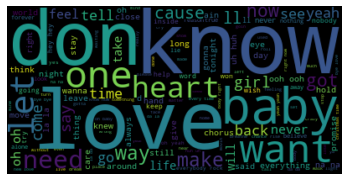

In [25]:
text = " ".join(review for review in df.lyricss)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../Image/bsb.png")

**Create Corpus**

In [26]:
corpus = df["lyricss"].tolist()
corpus

['i got mixed emotions did i finally find me a river that could lead me out to the ocean   cause i ve only ever known the kind of love  that leaves you battered and broken so forgive me for my mixed emotions  yeah yeah  i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do  baby  don t go breaking my heart  breaking my heart baby  don t go breaking my heart  breaking my heart  cause it s the only one i got  cause it s the only one i got  am i being too open   cause i told you everything i have to say  and now we re having a moment does it make you wanna pick up all your things  and drive away like it s stolen  just forgive me if i m being too open  no no no no  yeah yeah yeah  i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do  what love s supposed to do  i m not that kind 

**To do Next:** --> extract each each individual word and count most common --> Build model
1. from collections import Counter
2. c = Counter(corpus)
3. print(c.most_common(3))

4. Convert text to numbers by applying the Bag Of Words method

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
import nltk

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)
corpus

['i got mixed emotions did i finally find me a river that could lead me out to the ocean   cause i ve only ever known the kind of love  that leaves you battered and broken so forgive me for my mixed emotions  yeah yeah  i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do  baby  don t go breaking my heart  breaking my heart baby  don t go breaking my heart  breaking my heart  cause it s the only one i got  cause it s the only one i got  am i being too open   cause i told you everything i have to say  and now we re having a moment does it make you wanna pick up all your things  and drive away like it s stolen  just forgive me if i m being too open  no no no no  yeah yeah yeah  i m not that kind of person who can fall in and out of love with you that s not what love s supposed to do  what love s supposed to do  i m not that kind 

In [14]:
#Sparse Matrix

out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
out

<194x1956 sparse matrix of type '<class 'numpy.int64'>'
	with 9569 stored elements in Compressed Sparse Row format>

In [16]:
df = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df.head(3)

,000,10,25,2x,able,accept,accompanied,ache,act,actin,...,yearning,years,yell,yes,yesterday,yo,york,young,youâ,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Tf-Idf (Normalization)

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tdf.round(4)

,000,10,25,2x,able,accept,accompanied,ache,act,actin,...,yearning,years,yell,yes,yesterday,yo,york,young,youâ,zone
0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0291,0.0,0.0,0.0000,0.0,0.0,0.0,0.0
192,0.0,0.0,0.1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0


In [18]:
tdf.values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14375298, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

5. Build and train a Naive Bayes classifier